# Required Packages:

- pip install sktime==0.16.0

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

from sktime.annotation.igts import InformationGainSegmentation

from clasp.annotation.plotting.utils import (
    plot_time_series_with_change_points,
)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Loading the Data

In [2]:
def load_data():
    np_cols = ["x-acc", "y-acc", "z-acc", "x-gyro", "y-gyro", 
               "z-gyro", "x-mag", "y-mag", "z-mag", 
               "lat", "lon", "speed"]
    converters = {col : lambda val: np.array([]) 
                  if len(val) == 0 else np.array(eval(val)) for col in np_cols}
    return pd.read_csv("../datasets/har_challenge_no_labels.csv.zip", 
                       converters=converters, compression="zip")

df = load_data()

# Segmentation

We will only use one channel and a subset of the data

Used Channels: ['x-acc', 'y-acc', 'z-acc']


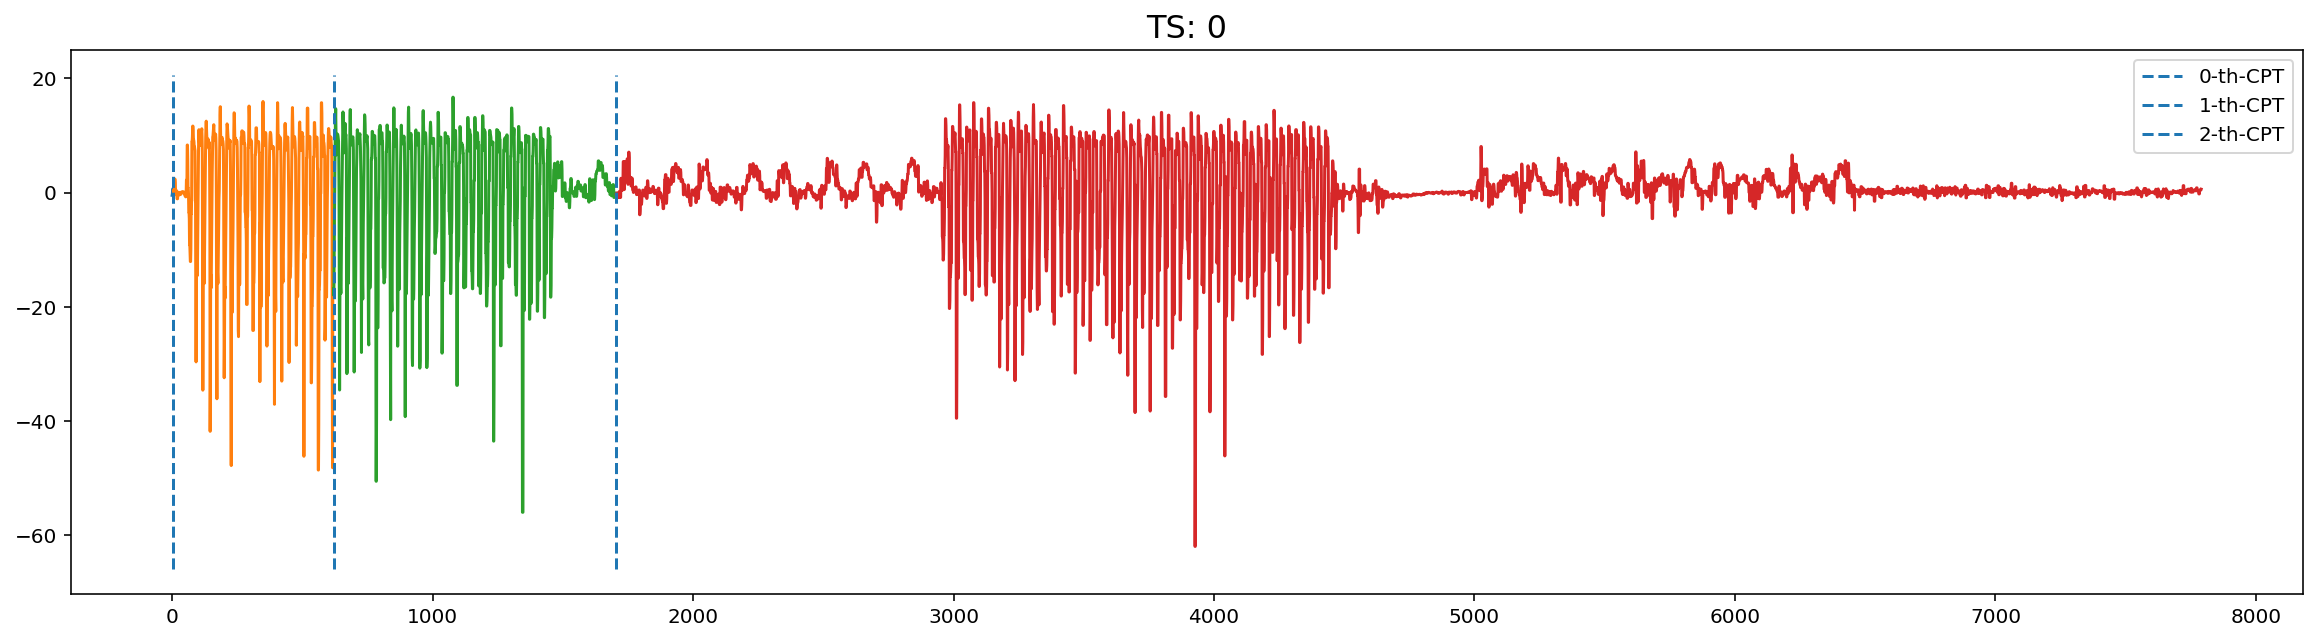

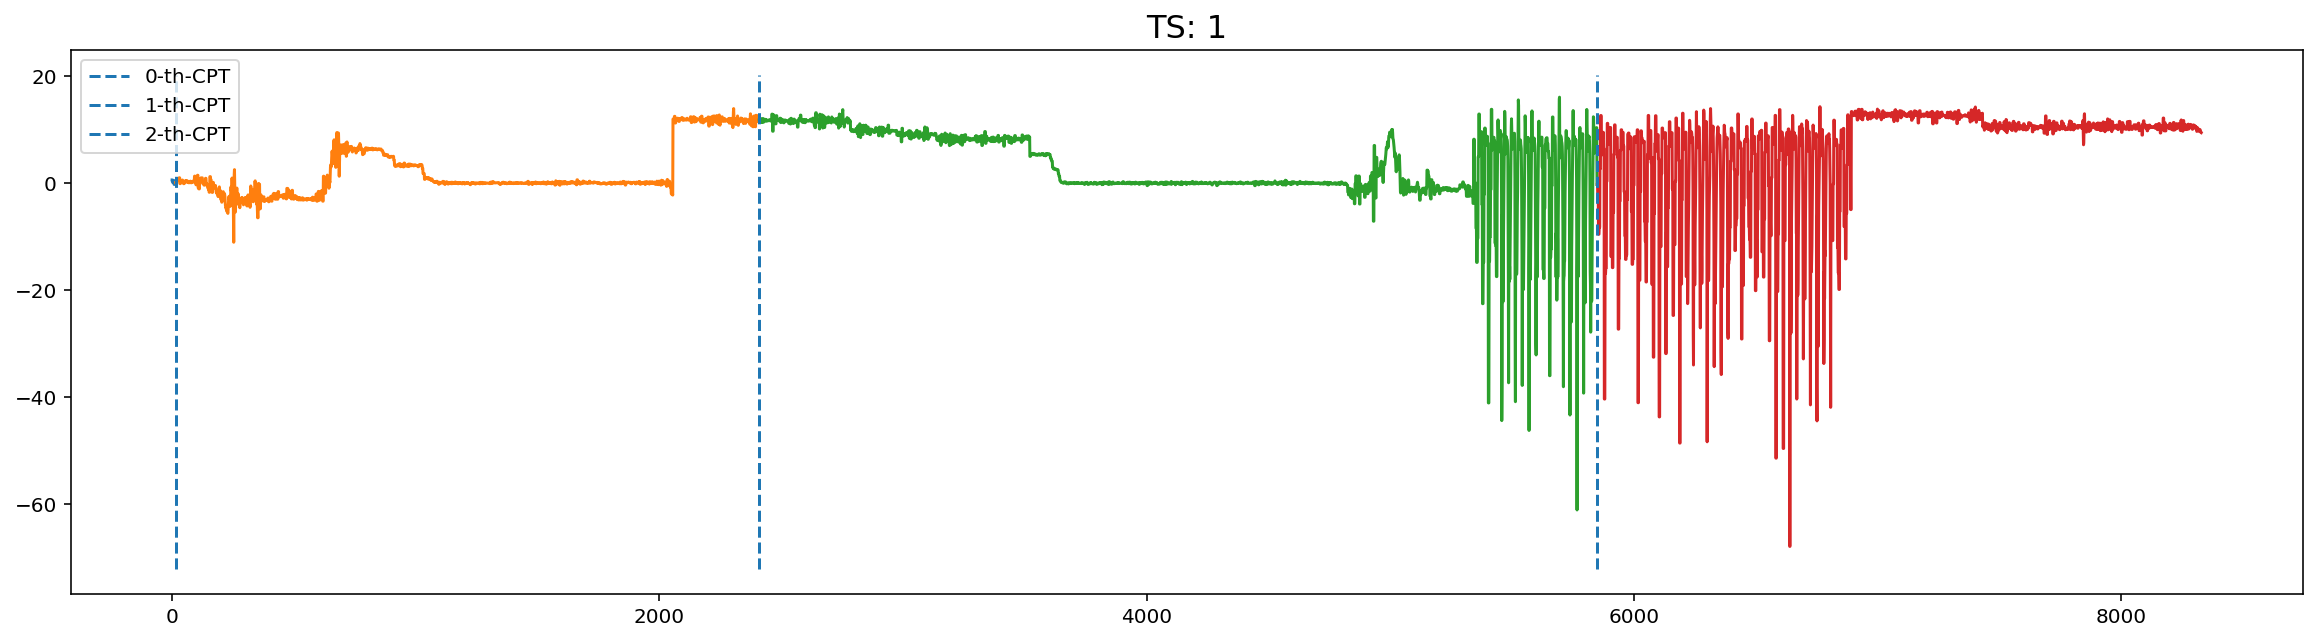

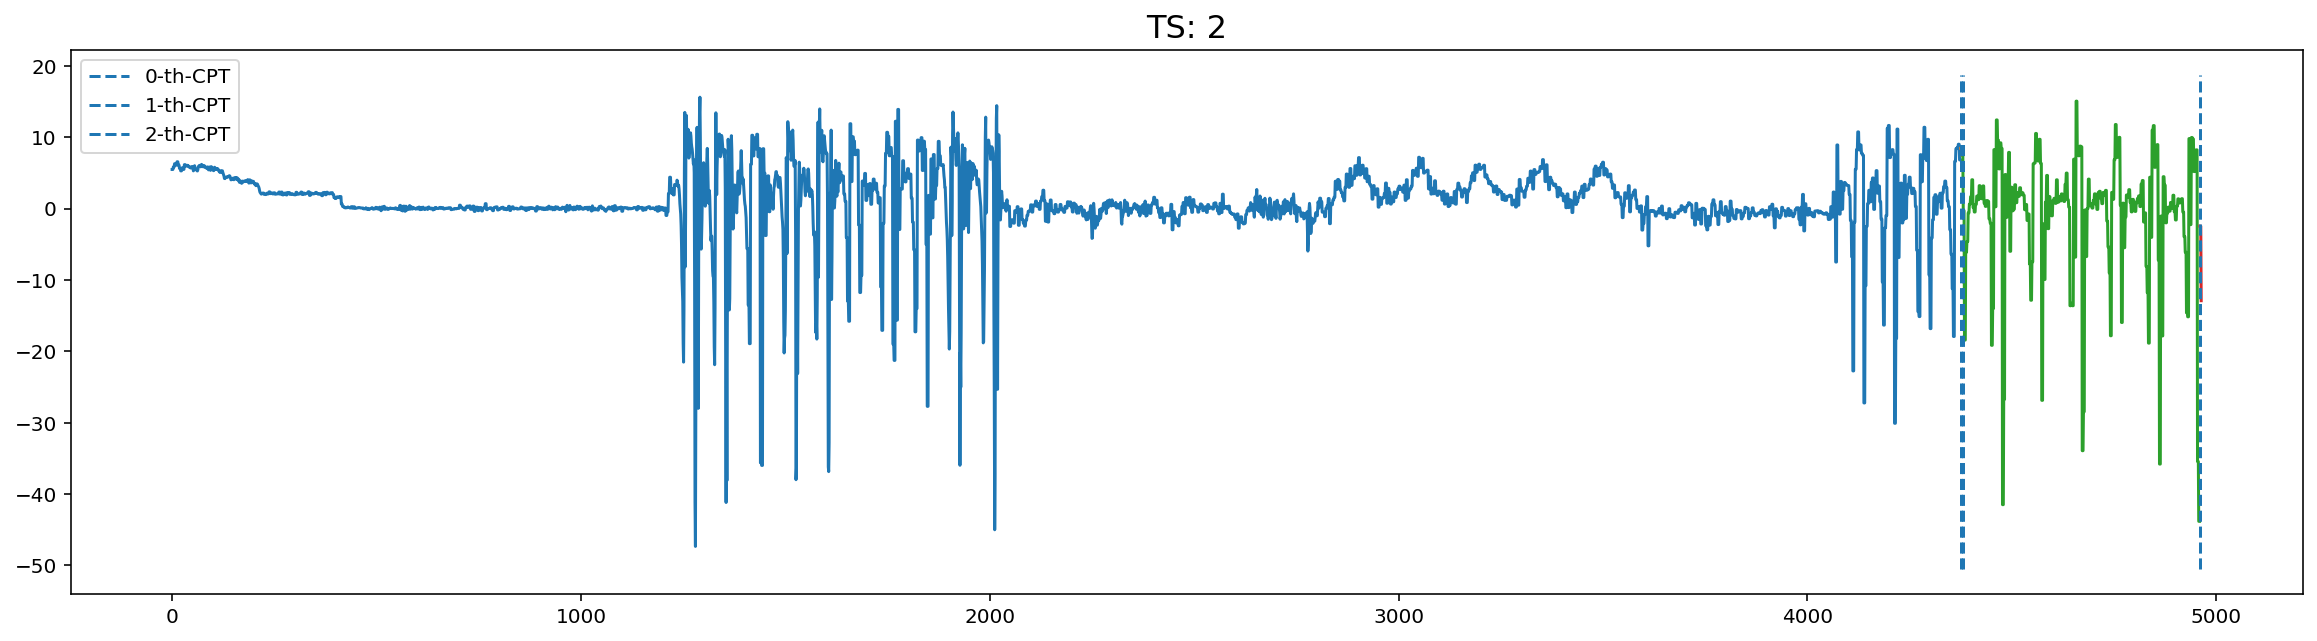

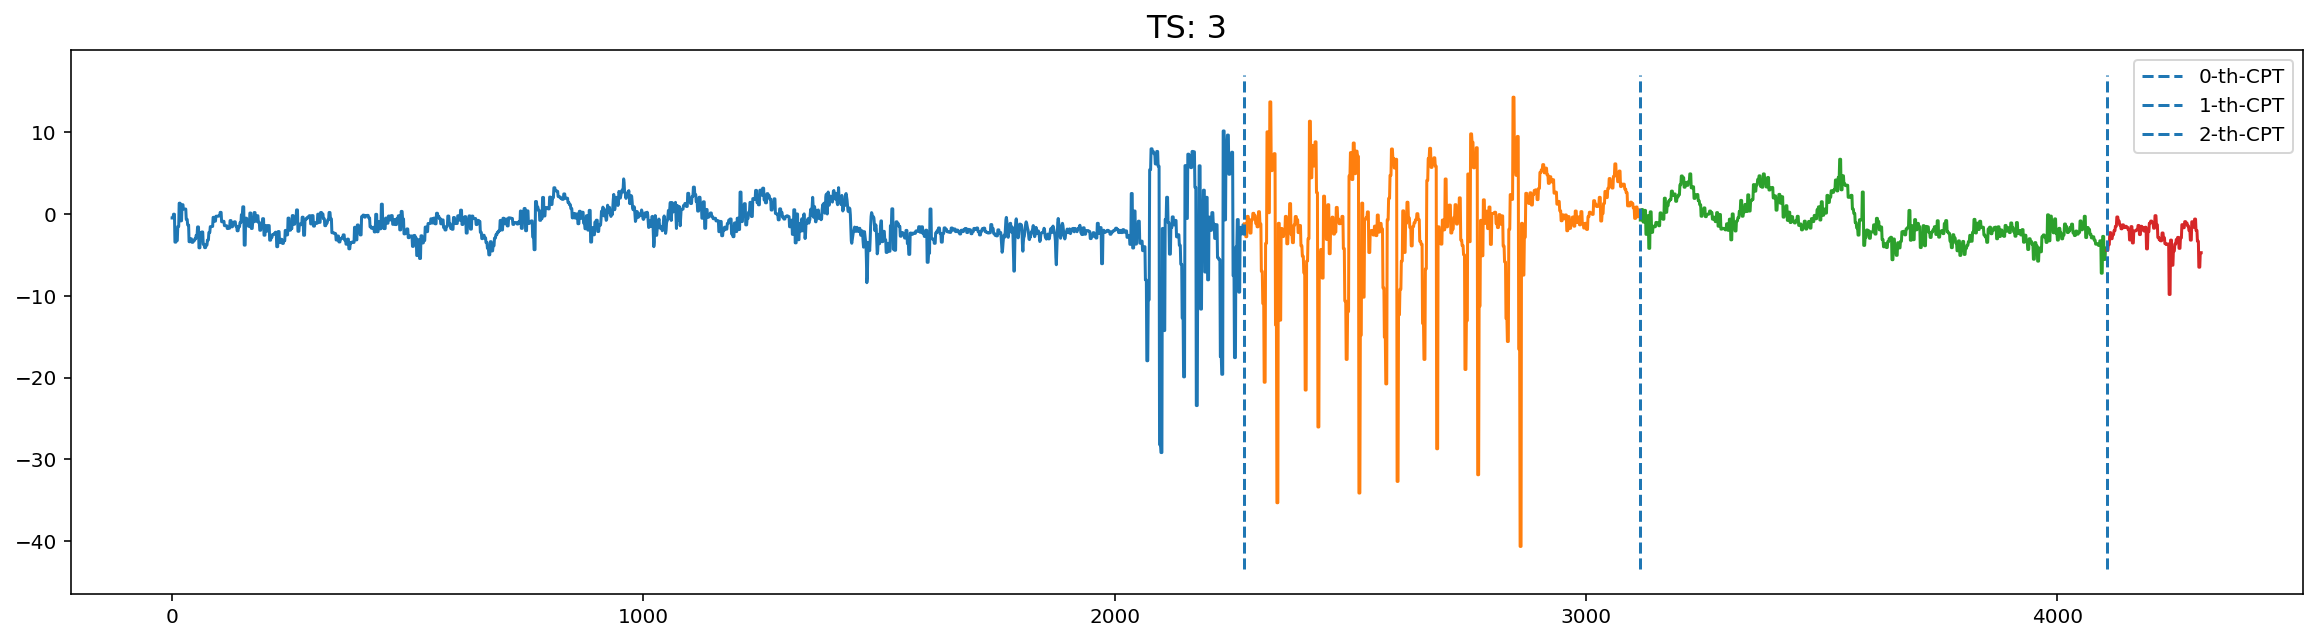

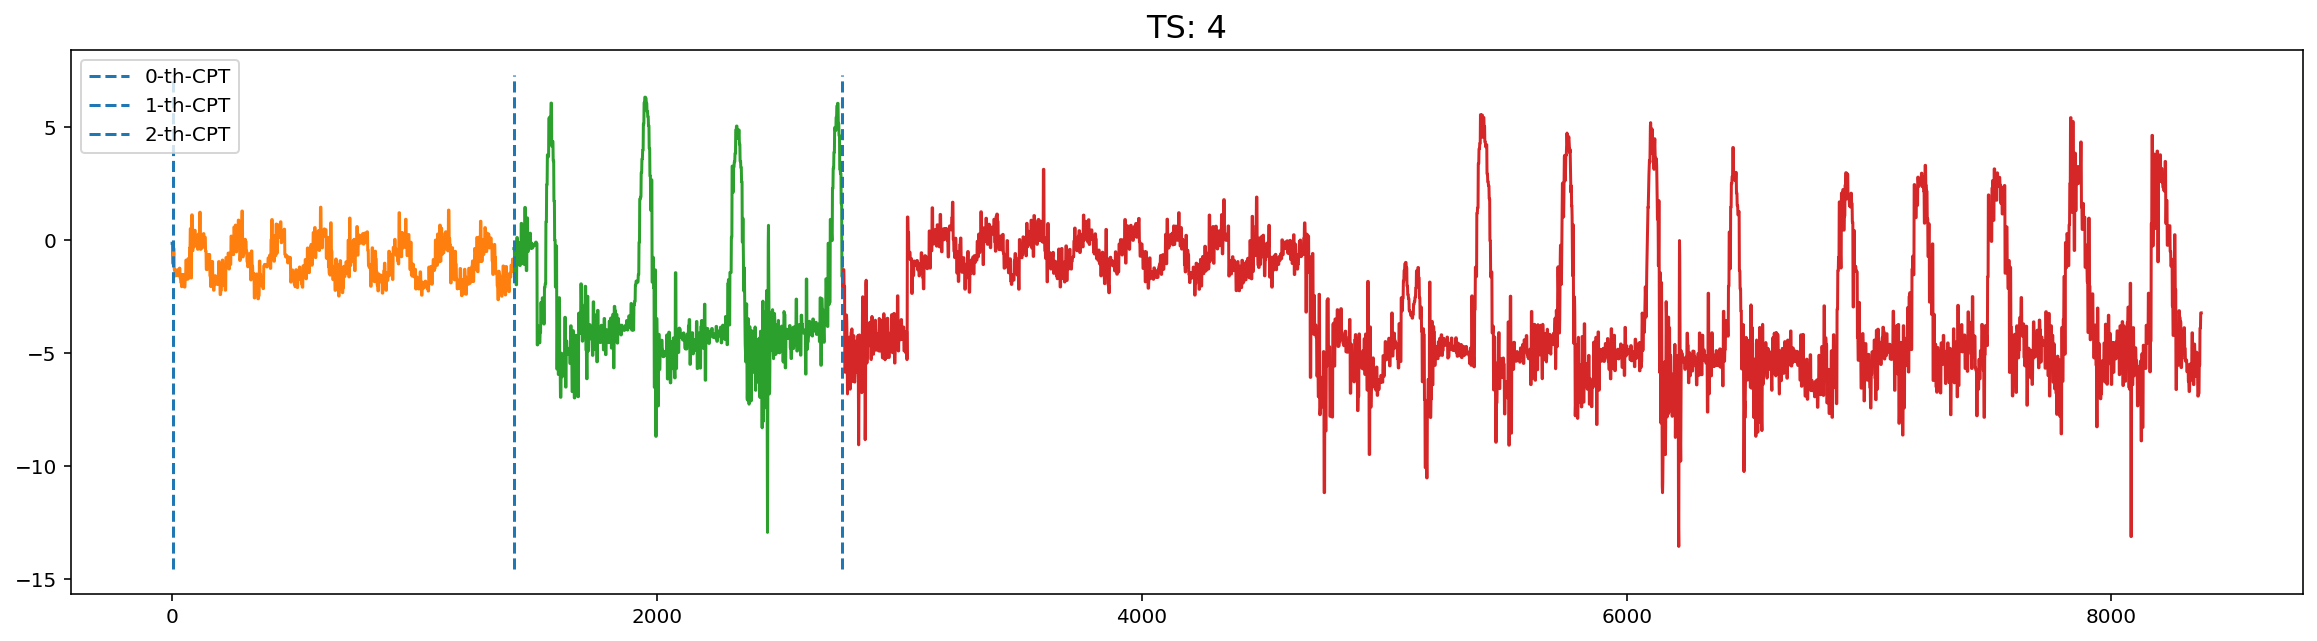

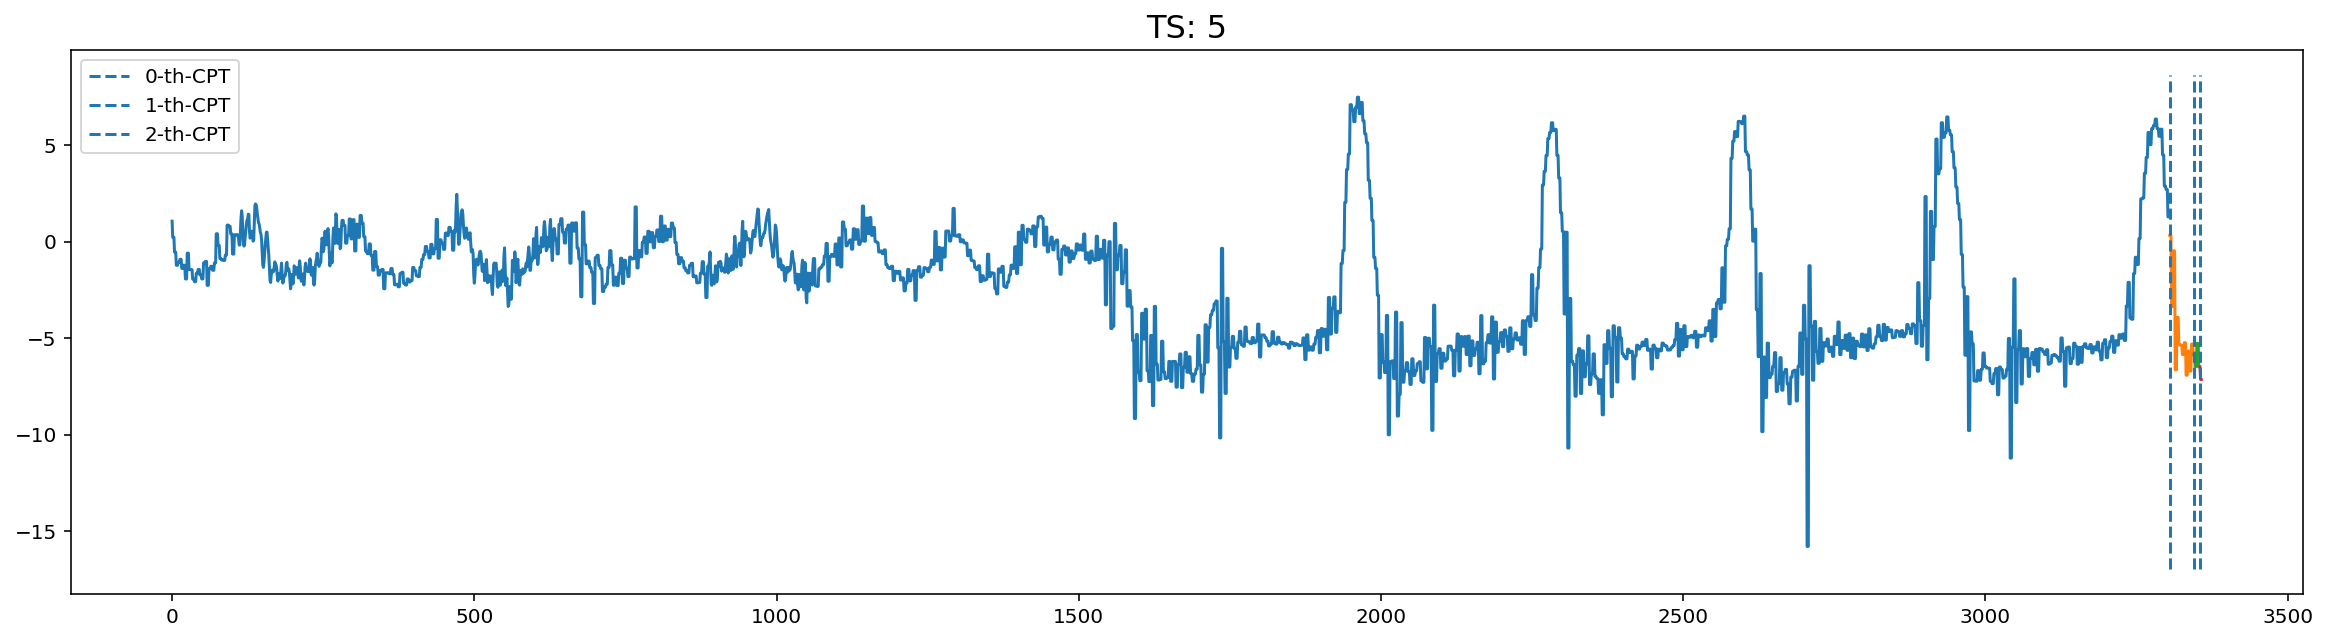

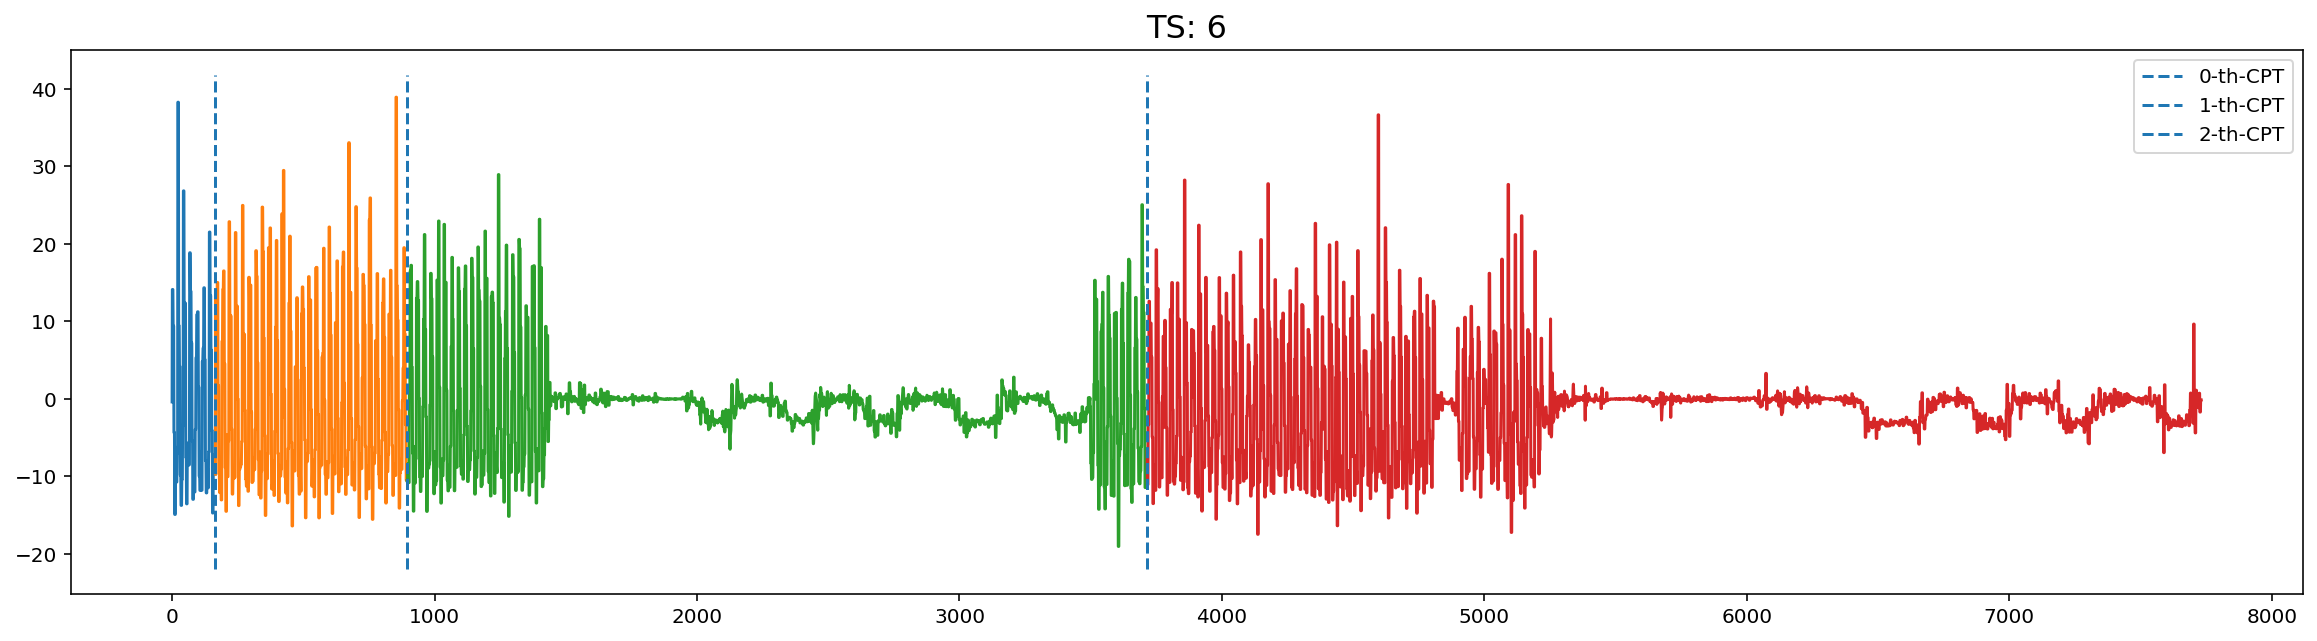

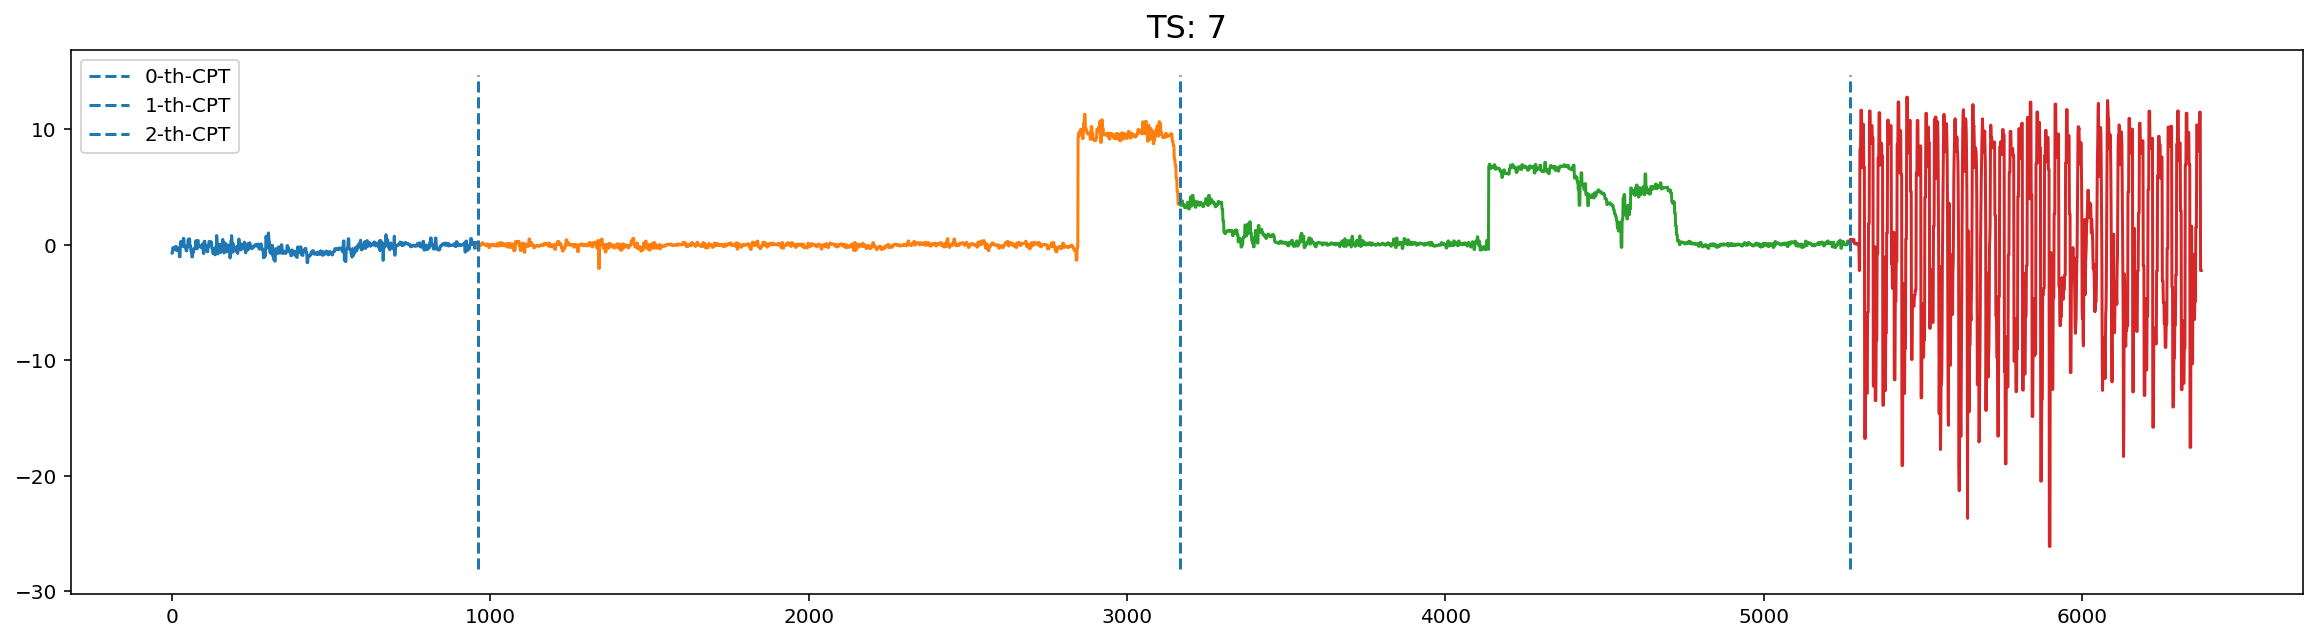

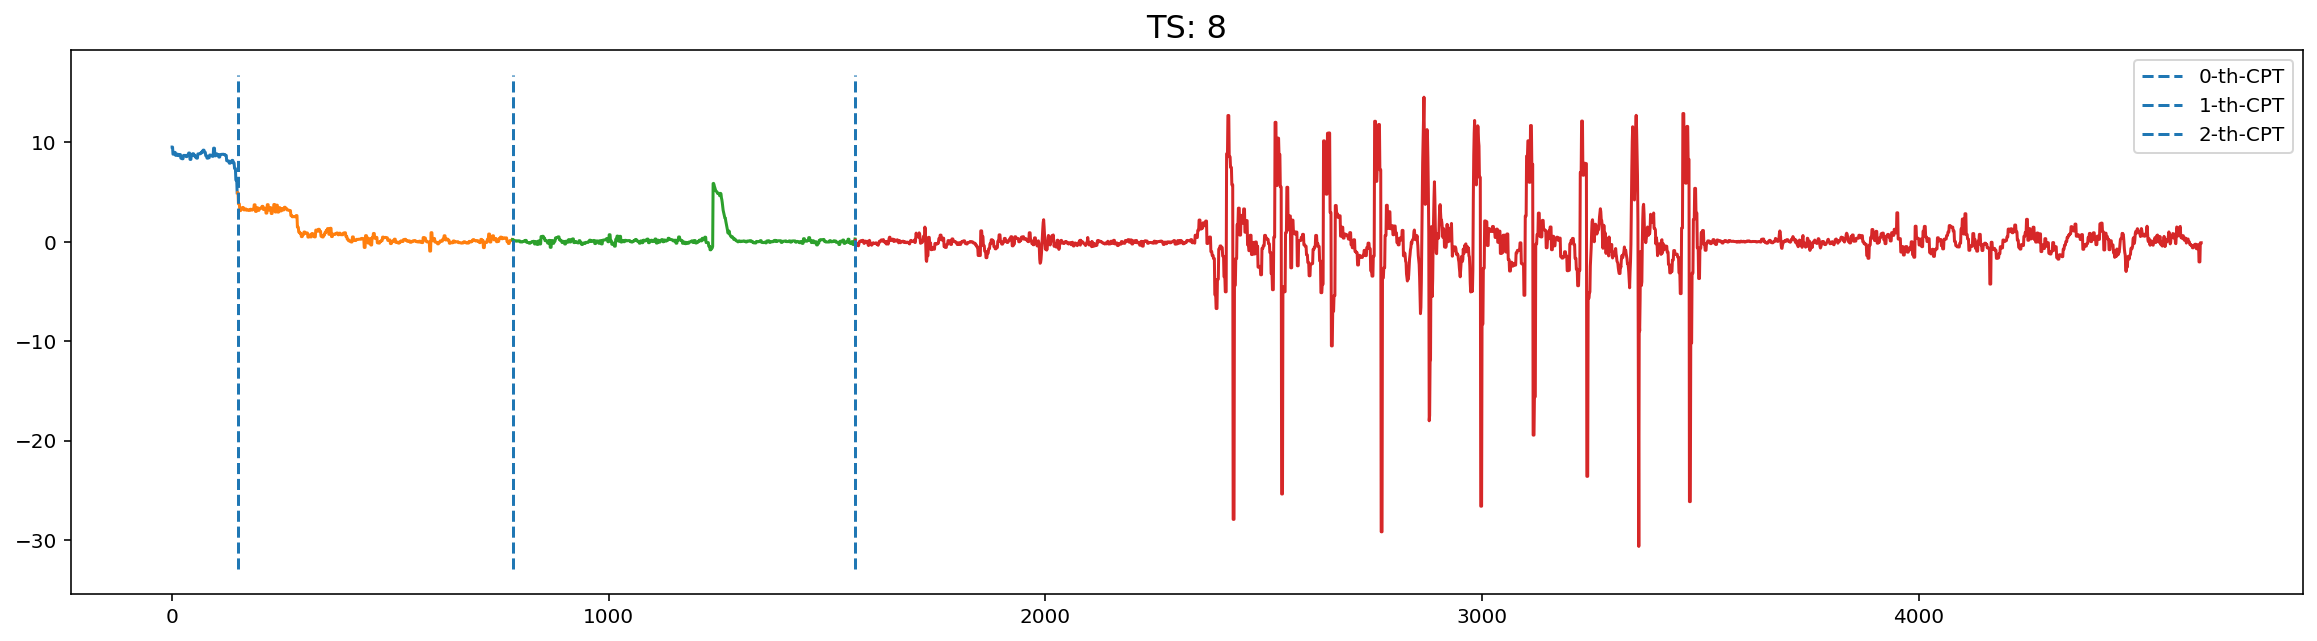

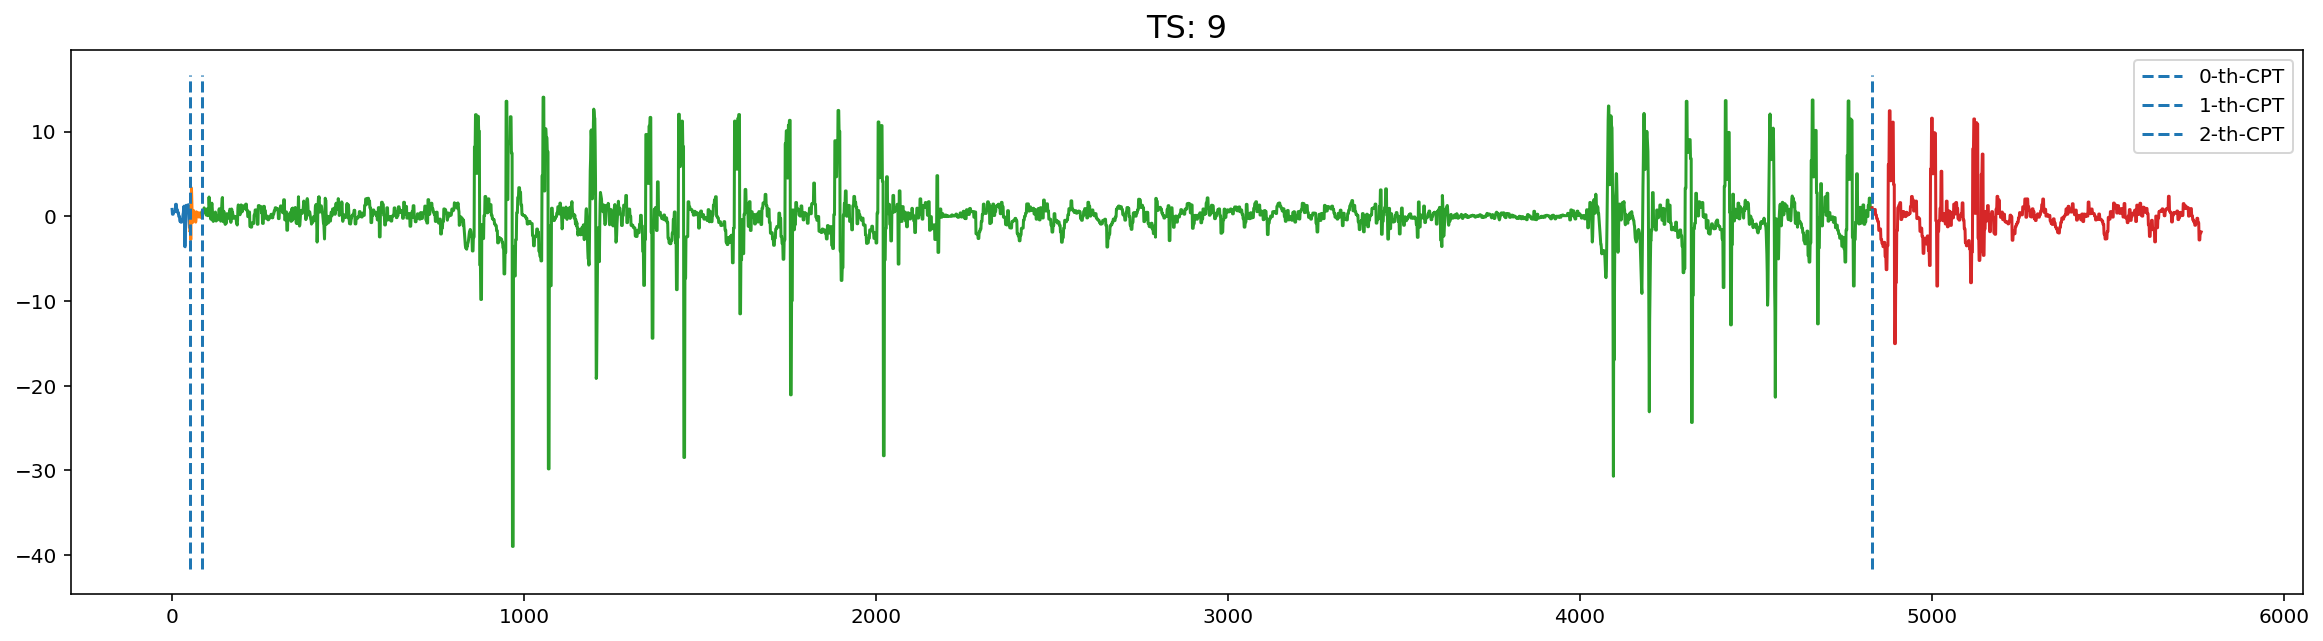

In [4]:
def score(i, ts):  
    if ts is not None and len(ts) > 0:
        X = np.concatenate(ts, axis=0).reshape(-1, len(channels))
        n_cps=3
        igts = InformationGainSegmentation(k_max=n_cps)
        igts.fit_predict(X)
        found_cps = igts.change_points_
        if (len(found_cps) >= 2):
            found_cps = found_cps[1:-1] # remove start and end of the series
            
        fig, ax = plot_time_series_with_change_points("TS: " + str(i), pd.Series(ts["y-acc"]), found_cps)
        plt.show()


# use only one channel
channels = ["x-acc", "y-acc", "z-acc"]

print ("Used Channels:", channels)

# using a subset of the data
dataset = df[channels].iloc[0:10]

for i in range(dataset.shape[0]):
    score(i, dataset.iloc[i][channels])